In [1]:
import pandas as pd
from analysis.classes import Country
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
country = Country('usa')
df = country.data  # Pandas df object, that contains the data from the db.


In [3]:
print("Part 1: Intro")
print(country)

Part 1: Intro

Countries name: Usa
Countries id: 1
Continent: North America
Continent id: 1
Population: 331171664
First update: 2020-08-02
Last update: 2020-11-30
Data number of rows: 106
Data number of columns: 18
Columns: 
['scrap_date', 'scrap_time', 'update_time_GMT', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [4]:
df.head(5)

,scrap_date,scrap_time,update_time_GMT,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
0,2020-08-02,20:00:00,NaN,1,USA,331171664,4778177,NaN,158039,NaN,2363229,NaN,2256909,18720,14428,477.0,59259593,178939
1,2020-08-08,20:00:00,NaN,1,USA,331203424,5120955,342778.0,164577,6538.0,2620147,256918.0,2336231,18038,15462,497.0,64096129,193525
2,2020-08-12,20:00:00,NaN,1,USA,331224597,5306851,185896.0,167761,3184.0,2756107,135960.0,2382983,17339,16022,506.0,66944595,202112
3,2020-08-16,20:00:00,NaN,1,USA,331245770,5530028,223177.0,172608,4847.0,2904130,148023.0,2453290,17186,16695,521.0,70228171,212012
4,2020-08-17,20:00:00,NaN,1,USA,331251064,5579686,49658.0,173258,650.0,2928179,24049.0,2478249,17237,16844,523.0,71149490,214790


In [5]:
df.dtypes

scrap_date         datetime64[ns]
scrap_time                 object
update_time_GMT            object
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object

In [6]:
print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


,null_count
scrap_date,0
scrap_time,0
update_time_GMT,59
Country_id,0
Country,0
Population,0
TotalCases,0
NewCases,1
TotalDeaths,0
NewDeaths,1


In [7]:
print("Part 2: Basic exploring")
print("Q1.Find the date of the day with the highest New Cases.")
date = df[df['NewCases'] == df['NewCases'].max()]['scrap_date'].dt.date
print('Answer:')
pd.DataFrame(date)

Part 2: Basic exploring
Q1.Find the date of the day with the highest New Cases.
Answer:


,scrap_date
1,2020-08-08


Q2.Visualize the cumulative data.


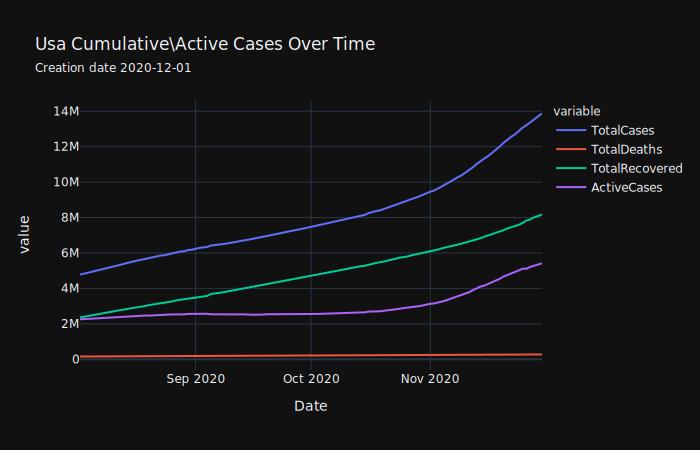

In [8]:
print("Q2.Visualize the cumulative data.")
fig = country.linear_plot(['TotalCases', 'TotalDeaths','TotalRecovered','ActiveCases'],save = True)
fig.show()

Q3.Visualize the data for October
Total time taken in monthly_plot function is: 0.0013833333333333334 minutes.


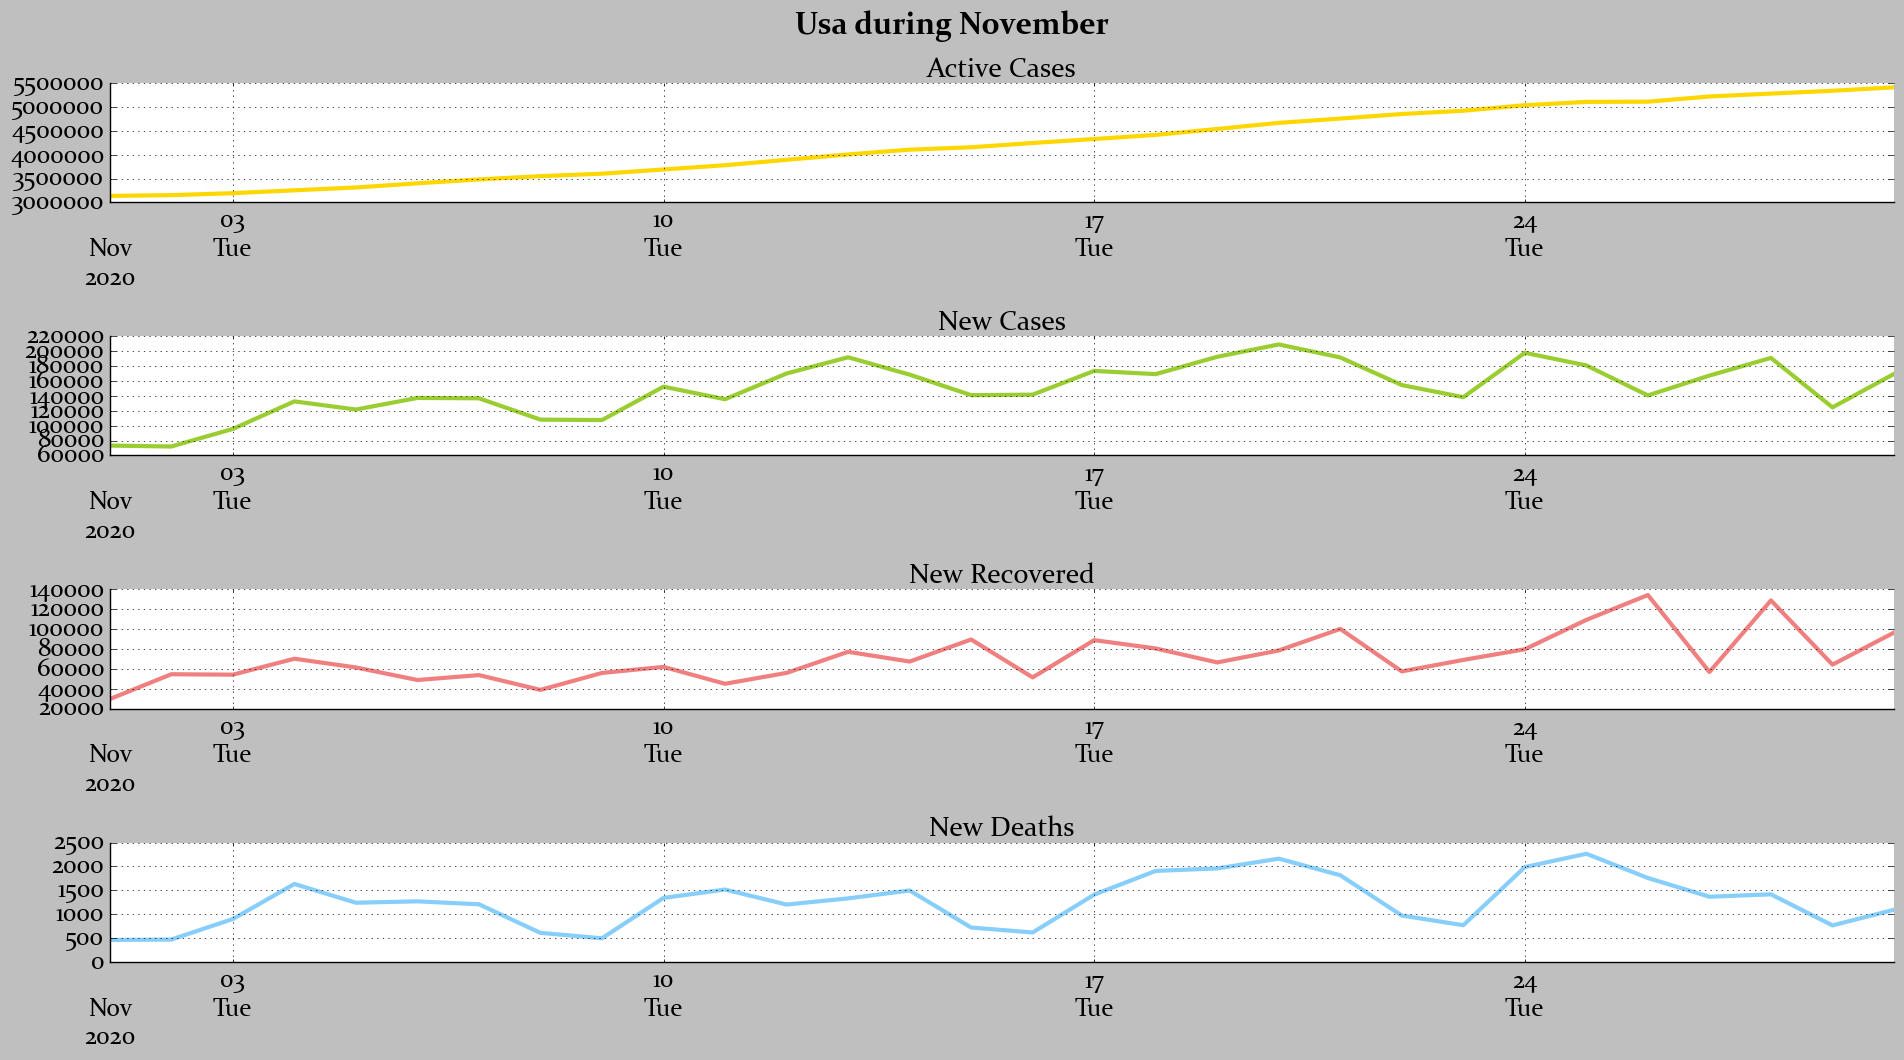

In [9]:
print("Q3.Visualize the data for October")
country.monthly_plot(['ActiveCases','NewCases','NewRecovered','NewDeaths'],11,2020,save = False)

Q4.Find the countries daily increases in death,recoveries,active cases,new cases
Total time taken in daily_increase function is: 0.010266666666666667 minutes.
Answer:


,NewDeaths
101,-0.224823
102,-0.223932
103,0.036711
104,-0.461756
105,0.431579


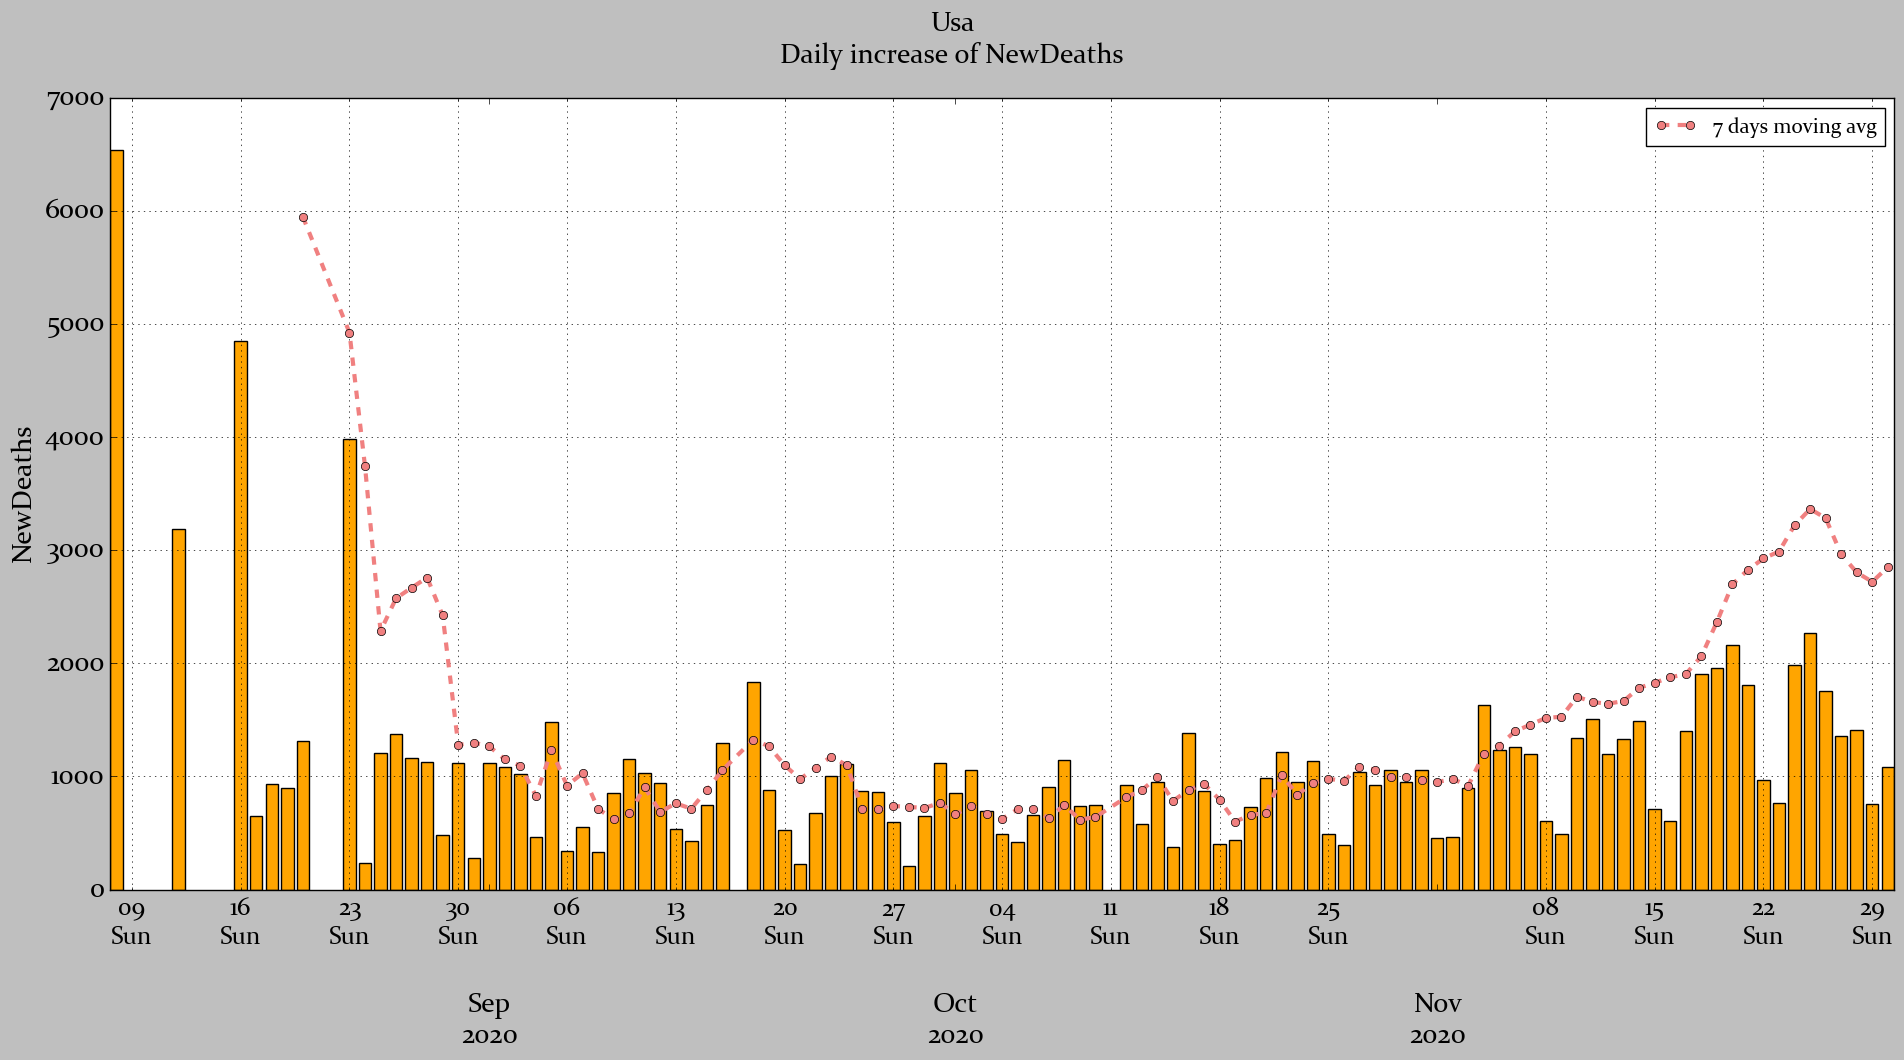

In [10]:
print("Q4.Find the countries daily increases in death,recoveries,active cases,new cases")
death_rate = df['NewDeaths'].pct_change()
country.daily_increase('NewDeaths', save = True)
print('Answer:')
pd.DataFrame(death_rate.tail(5))

Total time taken in daily_increase function is: 0.009683333333333332 minutes.
Answer:


,NewRecovered
101,0.229186
102,-0.577293
103,1.269772
104,-0.501900
105,0.502982


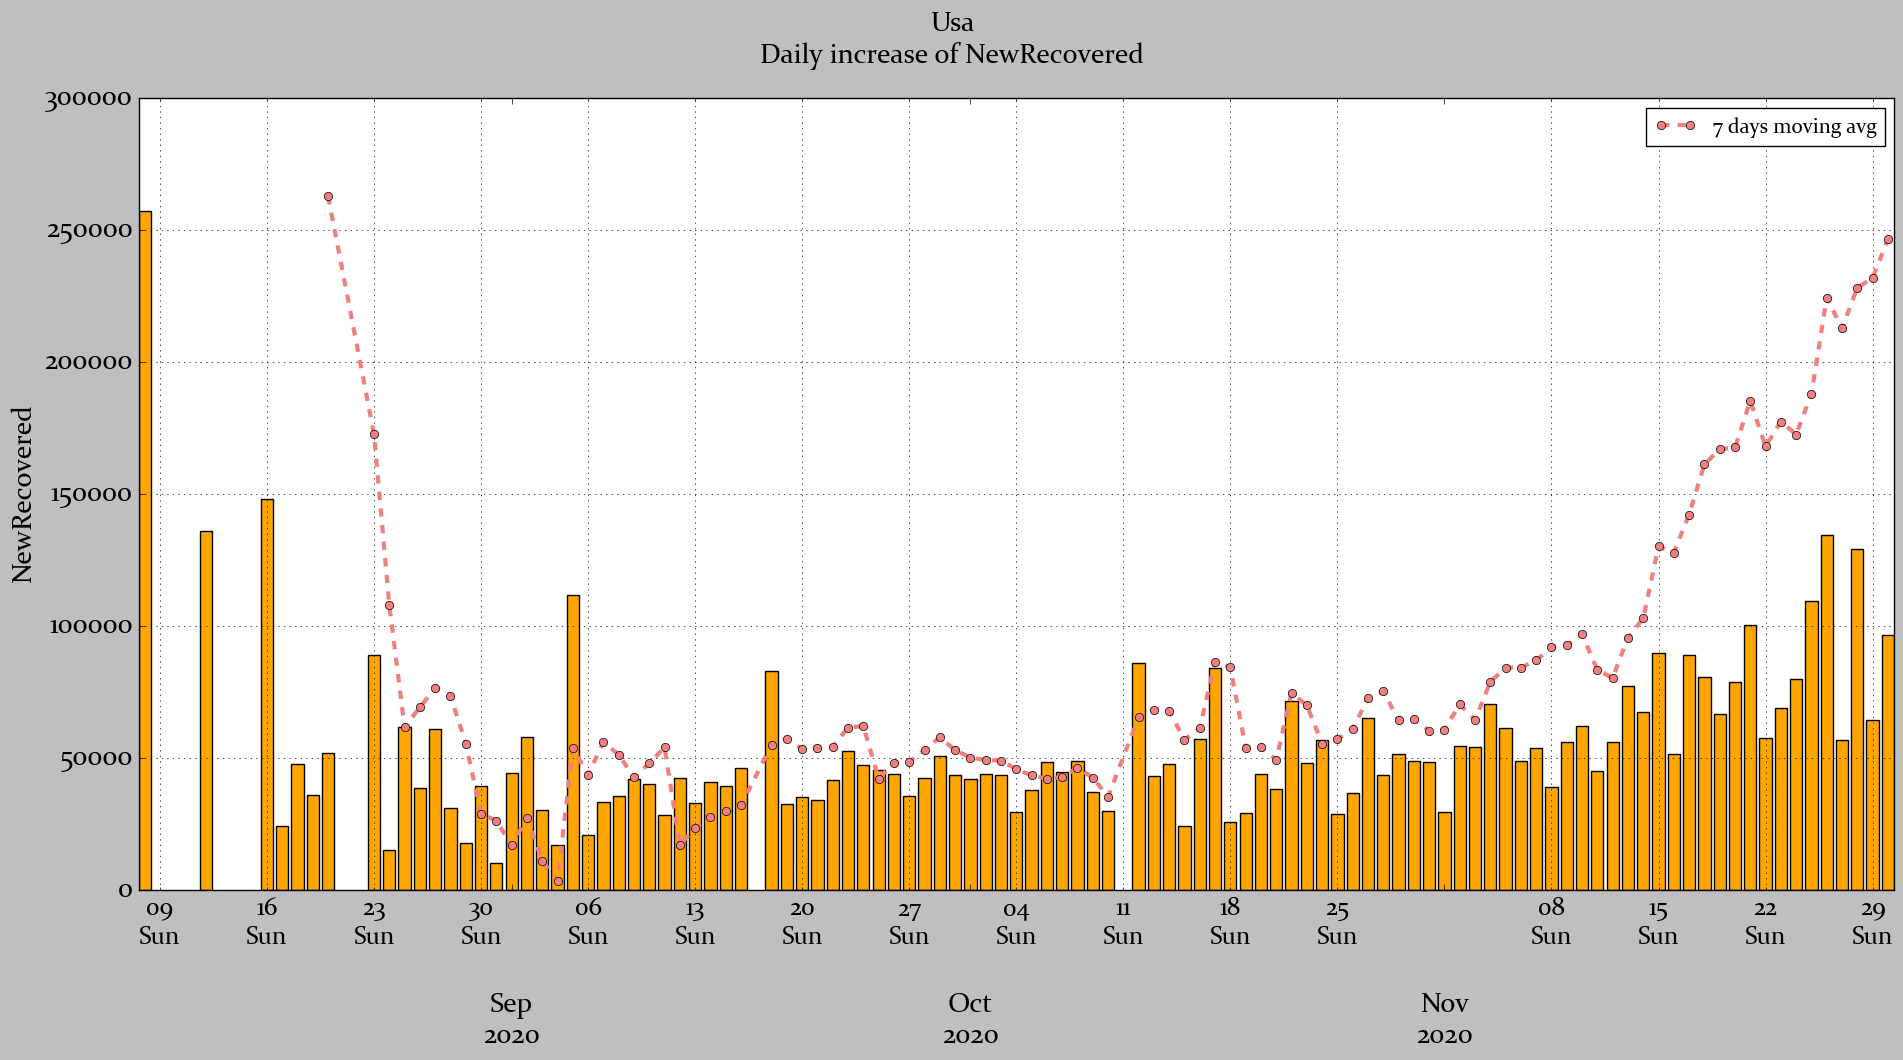

In [11]:
recovered_rate = df['NewRecovered'].pct_change()
country.daily_increase('NewRecovered', save = True)
print('Answer:')
pd.DataFrame(recovered_rate.tail(5))

Total time taken in daily_increase function is: 0.0103 minutes.
Answer:


,NewCases
101,-0.222633
102,0.189529
103,0.141988
104,-0.347878
105,0.360690


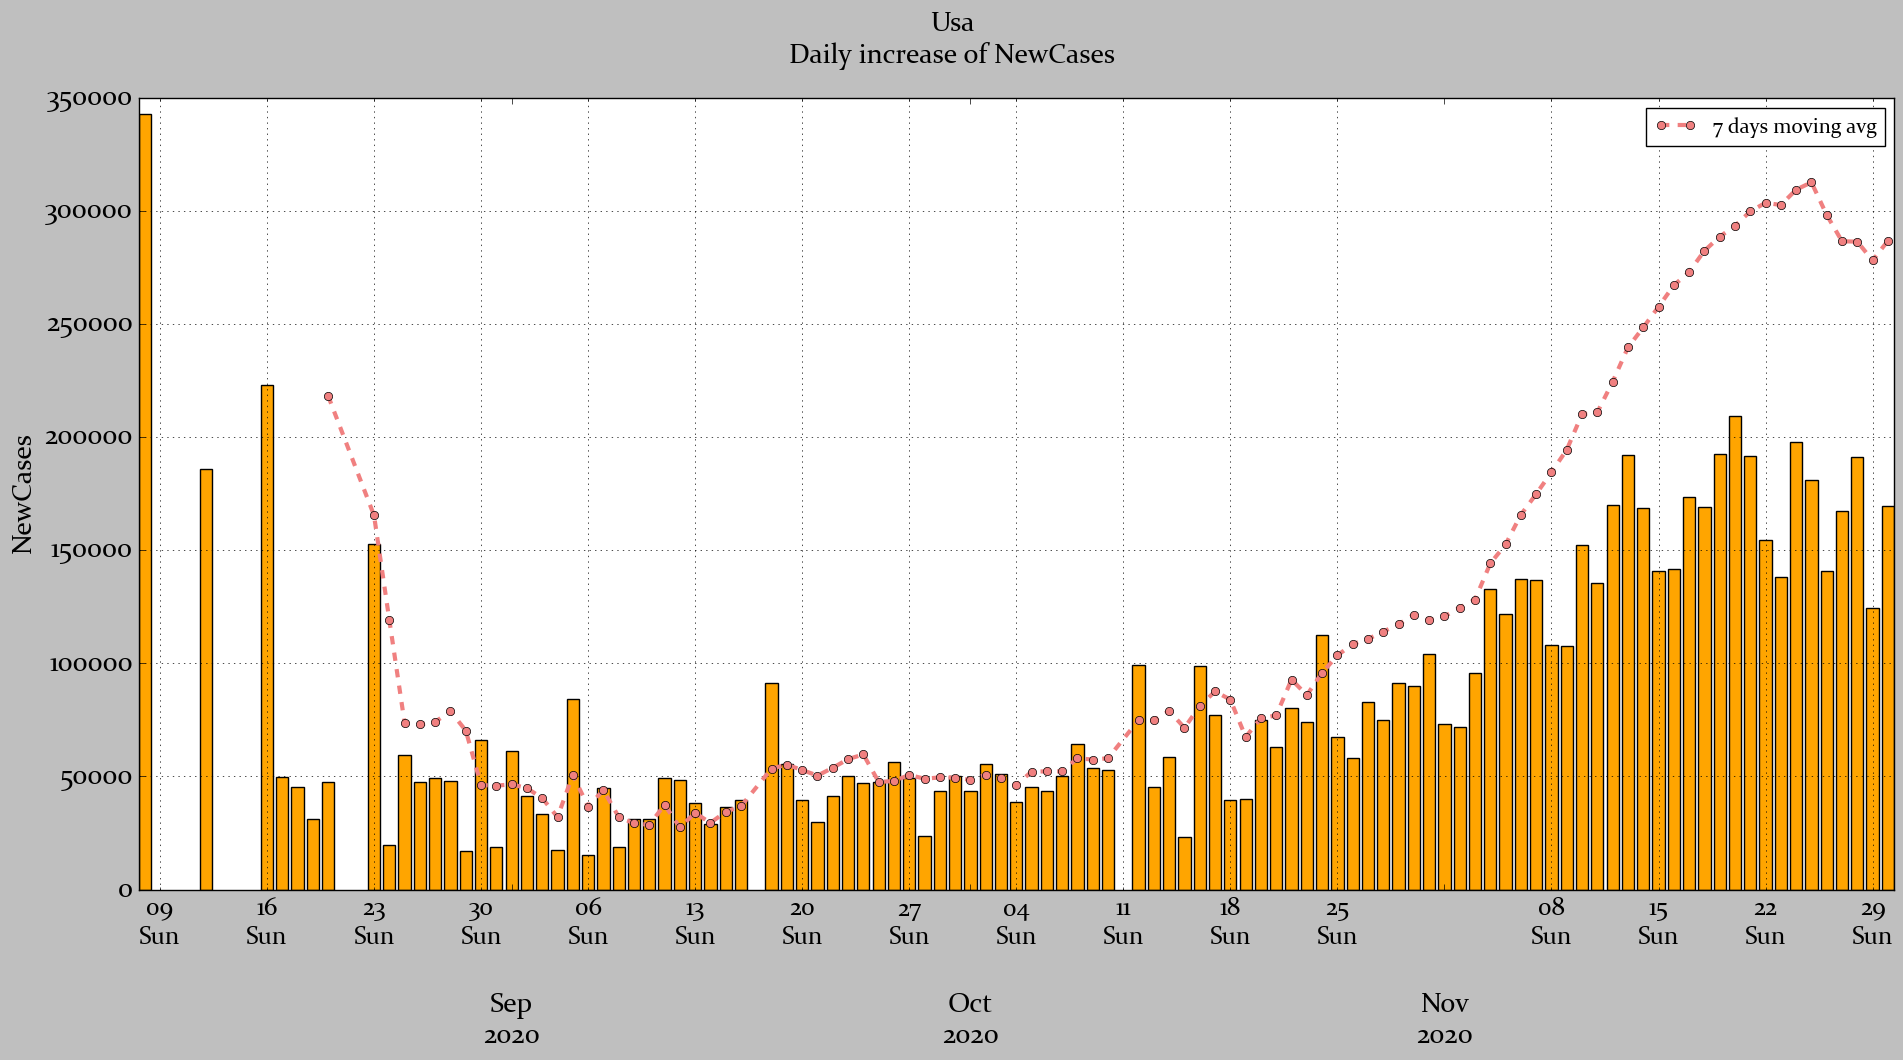

In [12]:
newcase_rate = df['NewCases'].pct_change()
country.daily_increase('NewCases', save = True)
print('Answer:')
pd.DataFrame(newcase_rate.tail(5))

Total time taken in daily_increase function is: 0.010783333333333334 minutes.
Answer:


,ActiveCases
101,0.000884
102,0.021344
103,0.011626
104,0.011284
105,0.013462


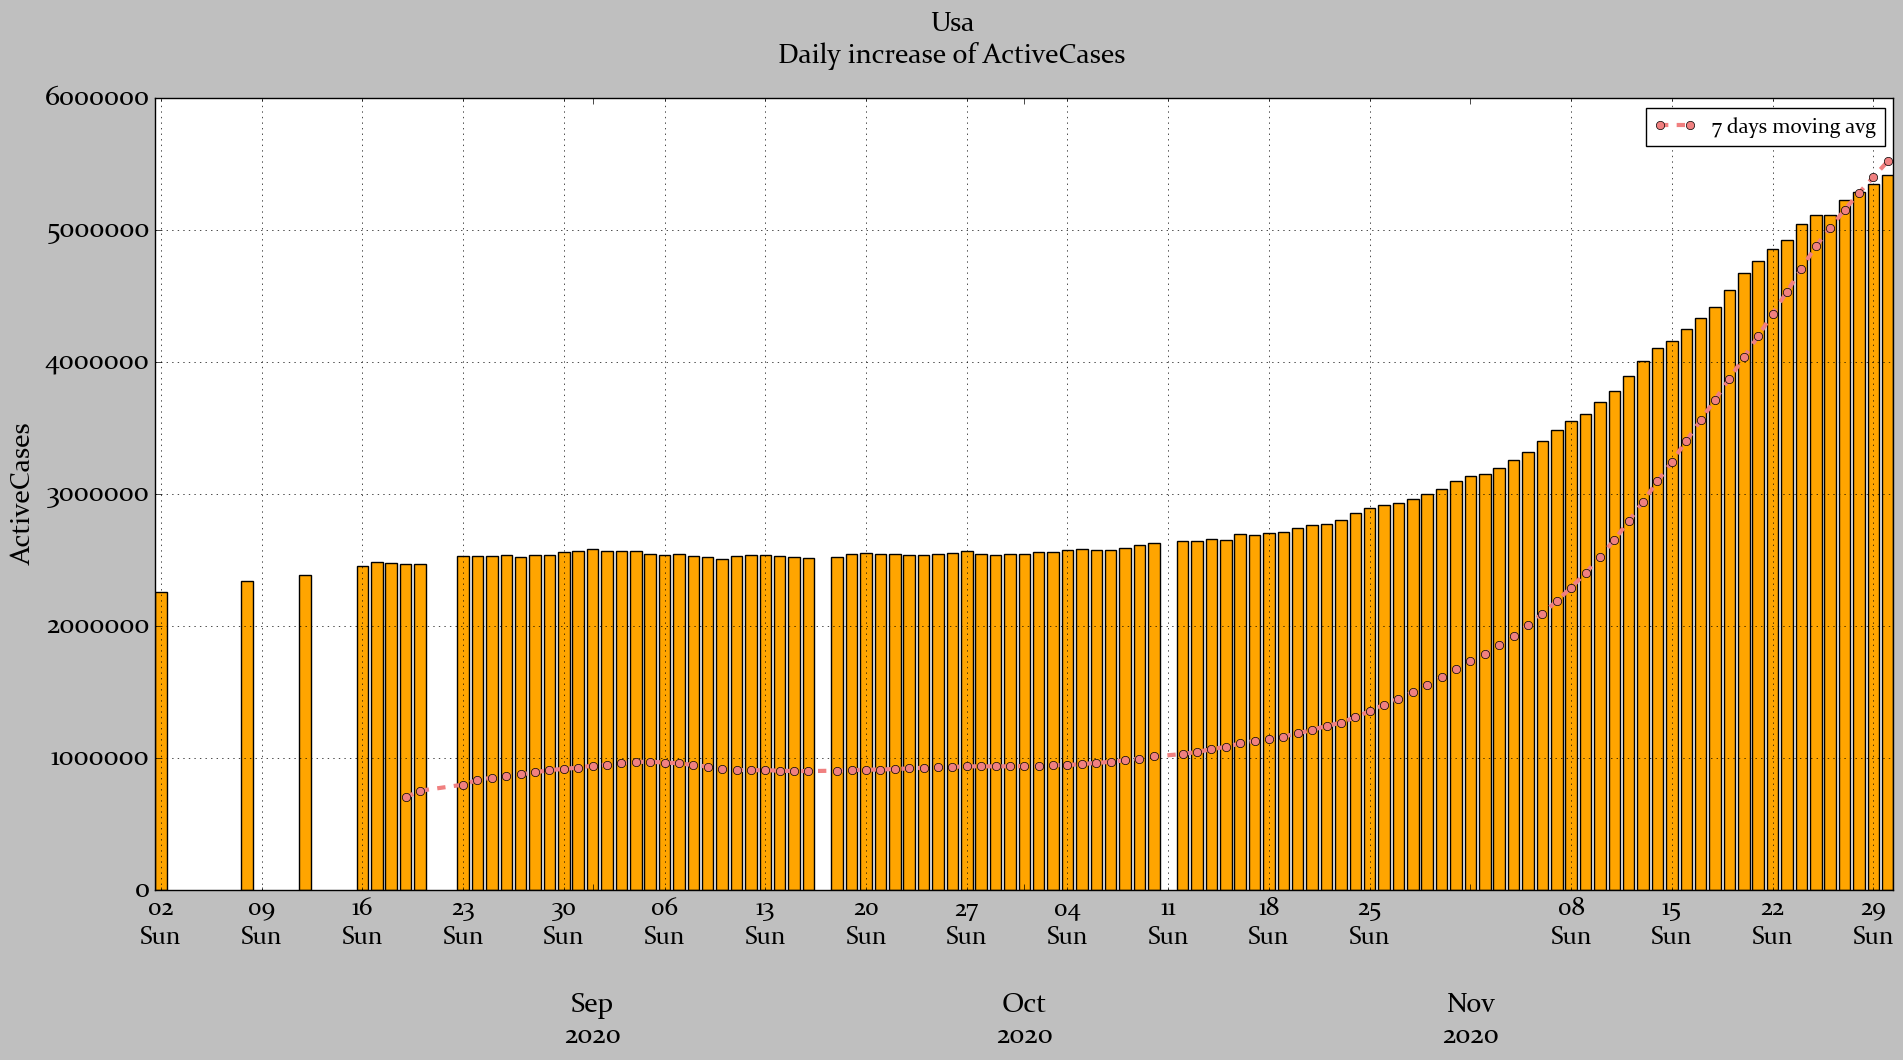

In [13]:
activeCases_rate = df['ActiveCases'].pct_change()
country.daily_increase('ActiveCases', save = True)
print('Answer:')
pd.DataFrame(activeCases_rate.tail(5))

Q5.Find closed cases ratio (TotalRecovered + TotalDeaths = TotalCases - ActiveCases)
Answer:
    TotalRecovered TotalDeaths
105         96.76%       3.24%
Total time taken in closed_cases_pie function is: 0.0026 minutes.


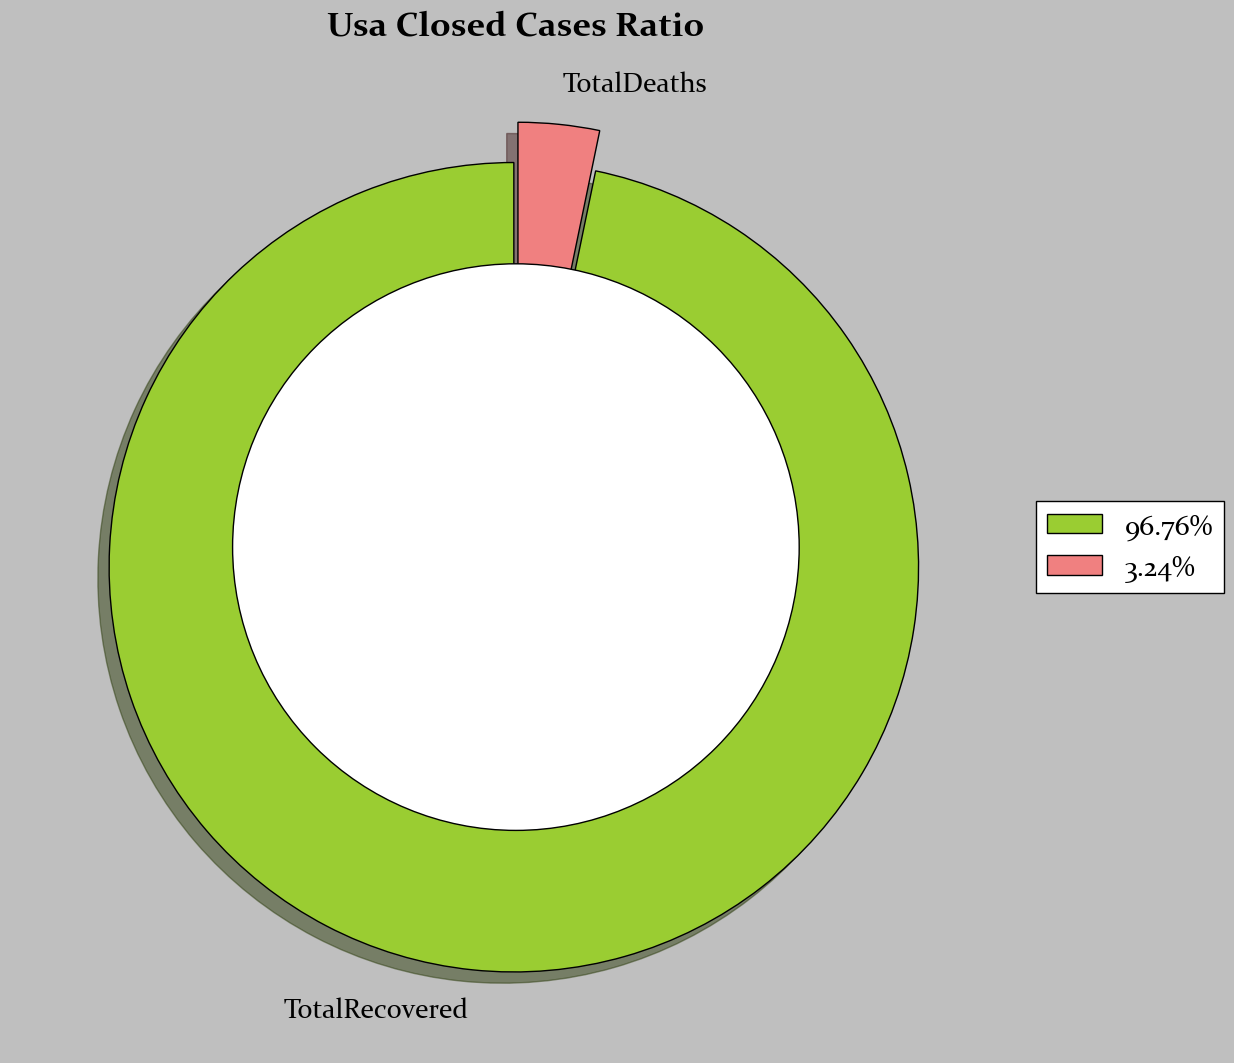

In [14]:
print("Q5.Find closed cases ratio (TotalRecovered + TotalDeaths = TotalCases - ActiveCases)")
updated_totals = df[df['scrap_date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
country.closed_cases_pie(save = True)

In [15]:
print("Q6.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
country.case_fatality_ratio().astype('str') + '%'

Q6.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'4.096%'

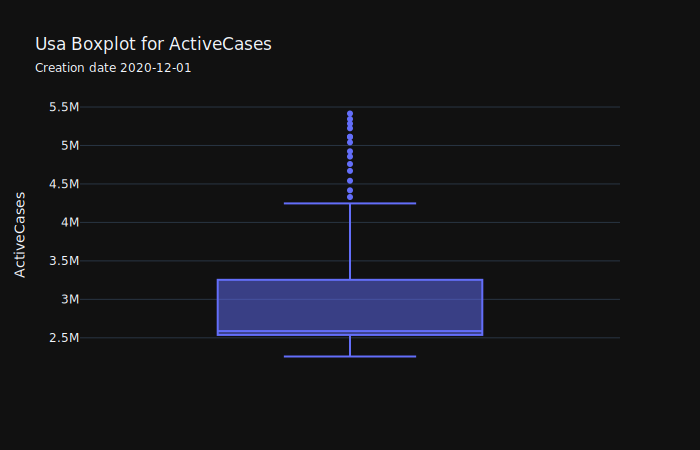

In [16]:
fig = country.boxplot('ActiveCases', save=True)
fig.show()